In [2]:
import yt
import numpy as np
import glob
from yt.mods import *
from yt.units.yt_array import YTQuantity
from yt.utilities.physical_constants import kboltz, mp, G

import cosmolopy as cp
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# Loading files with SEDs of star particles. 
# Each file is a 2D look-up table for a given wavelength.
# y-axis in the table is the age (in Myr)
# x-axis -- metalicity


muf_list = glob.glob("drt/muv.bin*") # it is the list of all available files

lam_list = np.zeros(len(muf_list))
lookup = np.zeros([len(muf_list), 188, 22])

for i in range(len(muf_list)):
    f = open(muf_list[i])
    header = f.readline()
    print header
    f.close()
    d1 = header.split()[0]
    d2 = header.split()[1]
    lam = float(header.split()[2])
    lam_list[i] = lam
    data = np.genfromtxt(muf_list[i], skip_header=1)
    dx = data[0, 1:]
    dy = data[1:, 0]
    lookup[i, :, :] = data[1:,1:]

 22 188  905.0

 22 188  915.0

 22 188  925.0

 22 188  935.0

 22 188  945.0

 22 188  955.0

 22 188  965.0

 22 188  975.0

 22 188  985.0

 22 188  995.0

 22 188 1005.0

 22 188 1015.0

 22 188 1025.0

 22 188 1035.0

 22 188 1045.0

 22 188 1055.0

 22 188 1065.0

 22 188 1075.0

 22 188 1085.0

 22 188 1095.0

 22 188 1105.0

 22 188 1115.0

 22 188 1125.0

 22 188 1135.0

 22 188 1145.0

 22 188 1155.0

 22 188 1165.0

 22 188 1175.0

 22 188 1185.0

 22 188 1195.0

 22 188 1205.0

 22 188 1215.0

 22 188 1225.0

 22 188 1235.0

 22 188 1245.0

 22 188 1255.0

 22 188 1265.0

 22 188 1275.0

 22 188 1285.0

 22 188 1295.0

 22 188 1305.0

 22 188 1315.0

 22 188 1325.0

 22 188 1335.0

 22 188 1345.0

 22 188 1355.0

 22 188 1365.0

 22 188 1375.0

 22 188 1385.0

 22 188 1395.0

 22 188 1405.0

 22 188 1415.0

 22 188 1425.0

 22 188 1435.0

 22 188 1442.0

 22 188 1447.0

 22 188 1455.0

 22 188 1465.0

 22 188 1475.0

 22 188 1485.0

 22 188 1495.0

 22 188 1505.0

 22 188 

ValueError: could not convert string to float: ******

In [6]:
# List of all snapshots
files = glob.glob("rei05B_a*/rei05B_a*.art")
files.sort()


In [7]:
# Loading a random file and looking at a projectino
iii = -4
snap_file = files[iii]
pf = load(snap_file)

prj = yt.ProjectionPlot(pf, 2, 'density')
prj.save()

yt : [WARNING  ] 2016-06-27 20:06:14,392 DeltaDC != 0, which implies auni != abox.  Be sure you understand which expansion parameter is appropriate for your use! (Gnedin, Kravtsov, & Rudd 2011)
yt : [INFO     ] 2016-06-27 20:06:14,413 Parameters: current_time              = 671829922.177 yr
yt : [INFO     ] 2016-06-27 20:06:14,413 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2016-06-27 20:06:14,414 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-06-27 20:06:14,414 Parameters: domain_right_edge         = [ 32.  32.  32.]
yt : [INFO     ] 2016-06-27 20:06:14,415 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2016-06-27 20:06:14,417 Parameters: current_redshift          = 7.71663967056
yt : [INFO     ] 2016-06-27 20:06:14,417 Parameters: omega_lambda              = 0.696400016546
yt : [INFO     ] 2016-06-27 20:06:14,417 Parameters: omega_matter              = 0.303599983454
yt : [INFO     ] 2016-06-27 20:06:14,417 Parameter

{}


yt : [INFO     ] 2016-06-27 20:06:27,269 Created 32 chunks for ARTIO
yt : [INFO     ] 2016-06-27 20:06:31,496 Projection completed
yt : [INFO     ] 2016-06-27 20:06:31,497 xlim = 0.000000 32.000000
yt : [INFO     ] 2016-06-27 20:06:31,499 ylim = 0.000000 32.000000
yt : [INFO     ] 2016-06-27 20:06:31,502 xlim = 0.000000 32.000000
yt : [INFO     ] 2016-06-27 20:06:31,503 ylim = 0.000000 32.000000
yt : [INFO     ] 2016-06-27 20:06:31,505 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2016-06-27 20:06:31,911 Saving plot rei05B_a0.1147.art_Projection_z_density.png


['rei05B_a0.1147.art_Projection_z_density.png']

In [10]:
# Prints the list of all available fields and derived fieds
print(pf.field_list)
print(pf.derived_field_list)

[('artio', 'HVAR_GAS_DENSITY'), ('artio', 'HVAR_GAS_ENERGY'), ('artio', 'HVAR_PRESSURE'), ('artio', 'HVAR_GAMMA'), ('artio', 'HVAR_INTERNAL_ENERGY'), ('artio', 'HVAR_MOMENTUM_X'), ('artio', 'HVAR_MOMENTUM_Y'), ('artio', 'HVAR_MOMENTUM_Z'), ('artio', 'RT_HVAR_HI'), ('artio', 'RT_HVAR_HII'), ('artio', 'RT_HVAR_HeI'), ('artio', 'RT_HVAR_HeII'), ('artio', 'RT_HVAR_HeIII'), ('artio', 'RT_HVAR_H2'), ('artio', 'HVAR_METAL_DENSITY_II'), ('artio', 'HVAR_METAL_DENSITY_Ia'), ('artio', 'HVAR_BLASTWAVE_TIME'), ('artio', 'VAR_POTENTIAL'), ('artio', 'VAR_POTENTIAL_HYDRO'), ('artio', 'RT_DISK_VAR_0'), ('artio', 'RT_DISK_VAR_1'), ('artio', 'RT_DISK_VAR_2'), ('artio', 'RT_DISK_VAR_3'), ('artio', 'RT_DISK_VAR_4'), ('artio', 'RT_DISK_VAR_5'), ('N-BODY', 'POSITION_Y'), ('STAR', 'BIRTH_TIME'), ('N-BODY', 'POSITION_Z'), ('N-BODY', 'PID'), ('N-BODY', 'VELOCITY_Y'), ('STAR', 'TIMESTEP'), ('N-BODY', 'TIMESTEP'), ('N-BODY', 'SPECIES'), ('STAR', 'METALLICITY_SNIa'), ('STAR', 'INITIAL_MASS'), ('N-BODY', 'POSITION_

yt : [INFO     ] 2016-06-27 20:08:04,332 Created 182 chunks for ARTIO


<IPython.core.display.Javascript object>


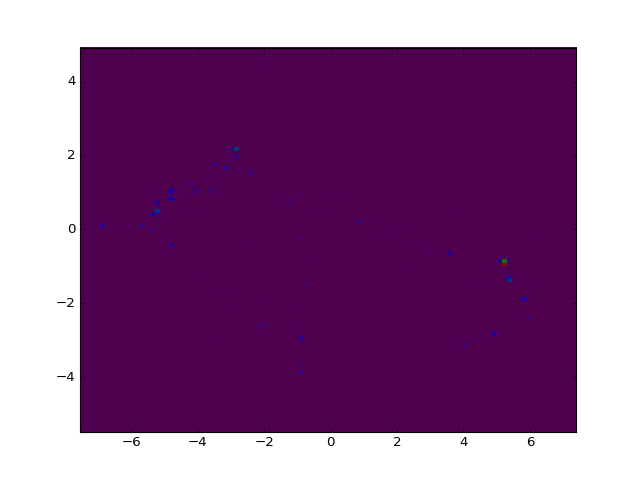

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-7.54294616, -7.39364189, -7.24433763, -7.09503336, -6.9457291 ,
        -6.79642483, -6.64712057, -6.4978163 , -6.34851204, -6.19920777,
        -6.0499035 , -5.90059924, -5.75129497, -5.60199071, -5.45268644,
        -5.30338218, -5.15407791, -5.00477365, -4.85546938, -4.70616512,
        -4.55686085, -4.40755659, -4.25825232, -4.10894806, -3.95964379,
        -3.81033953, -3.66103526, -3.511731  , -3.36242673, -3.21312247,
        -3.0638182 , -2.91451394, -2.76520967, -2.61590541, -2.46660114,
        -2.31729687, -2.16799261, -2.01868834, -1.86938408, -1.72007981,
        -1.57077555, -1.42147128, -1.27216702, -1.12286275, -0.97355849,
        -0.82425422, -0.67494996, -0.52564569, -0.3763414

In [11]:
# Selecting a region within a simulation box and extracting all star particles

# center point
x_c = 12
y_c = 21
z_c = 16

x_c = 16
y_c = 16
z_c = 16

reg = pf.sphere([x_c, y_c, z_c], 8)
# reg = pf.all_data()
reg_test = pf.sphere([x_c, y_c, z_c], 2)


x = np.array(reg[('STAR', 'POSITION_X')]) - x_c
y = np.array(reg[('STAR', 'POSITION_Y')]) - y_c
z = np.array(reg[('STAR', 'POSITION_Z')]) - z_c
m = reg[('STAR', 'MASS')]
im = reg[('STAR', 'INITIAL_MASS')]
t = np.log10(reg[('STAR', 'age')].in_units('yr'))
met = reg[('STAR', 'METALLICITY_SNIa')] + reg[('STAR', 'METALLICITY_SNII')]
species = reg[('STAR', 'SPECIES')]

plt.hist2d(x,y,100)

In [12]:
# Setting up a redshift (it should be consistent with the snapshot)
redshift = 8.0

# Angular distance
DA = cp.distance.angular_diameter_distance(redshift, **cp.fidcosmo)

# Arcseciond in a radian
secinrad = 206265.0

# Defining the resolution of the image
nbins = int(4./32*5./(1.+redshift)/DA*secinrad*10)


from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator

image = np.zeros([nbins, nbins, 3, len(lam_list)])


60


<IPython.core.display.Javascript object>


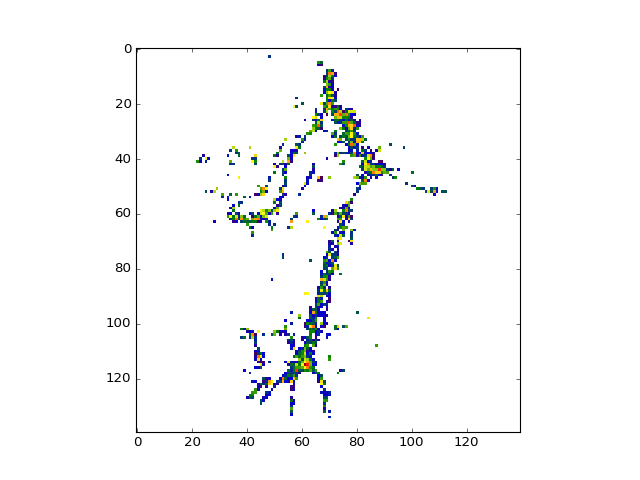

In [13]:

for i in [60]:#range(len(lam_list))[::10]:
    print i
    interp = interp2d(dx, dy, lookup[i, :, :])
    temp = m.copy()
    for j in range(len(m)):
        temp[j] *= interp(met[j], t[j])[0]
    xedges = np.linspace(-reg.radius, reg.radius, nbins+1)
    yedges = np.linspace(-reg.radius, reg.radius, nbins+1)
    H, X, Y = np.histogram2d(x, y, bins=(xedges, yedges), weights = temp)
    image[:, :, 0, i] = H
    H, X, Y = np.histogram2d(y, z, bins=(xedges, yedges), weights = temp)
    image[:, :, 1, i] = H
    H, X, Y = np.histogram2d(x, z, bins=(xedges, yedges), weights = temp)
    image[:, :, 2, i] = H

plt.figure(2)
plt.imshow(np.log10(image[:,:,0,60]), interpolation='nearest')
